In [1]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## ignoring unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## reading the data
data_url = "https://drive.google.com/file/d/1xEM4cjfUHftVelPE-nInrY8Tbzr9yG-r/view?usp=sharing"
inital_url = "https://drive.google.com/uc?id="

data_url = inital_url + data_url.split('/')[-2]
df = pd.read_csv(data_url)

**Feature information:**
1. age - age of the patient (int)
2. sex - sex patient identifies (str)
3. on_thyroxine - whether patient is on thyroxine (bool)
4. query on thyroxine - *whether patient is on thyroxine (bool)
5. on antithyroid meds - whether patient is on antithyroid meds (bool)
6. sick - whether patient is sick (bool)
7. pregnant - whether patient is pregnant (bool)
8. thyroid_surgery - whether patient has undergone thyroid surgery (bool)
9. I131_treatment - whether patient is undergoing I131 treatment (bool)
10. query_hypothyroid - whether patient believes they have hypothyroid (bool)
11. query_hyperthyroid - whether patient believes they have hyperthyroid (bool)
12. lithium - whether patient * lithium (bool)
13. goitre - whether patient has goitre (bool)
14. tumor - whether patient has tumor (bool)
15. hypopituitary - whether patient * hyperpituitary gland (float)
16. psych - whether patient * psych (bool)
17. TSH_measured - whether TSH was measured in the blood (bool)
17. TSH - TSH level in blood from lab work (float)
18. T3_measured - whether T3 was measured in the blood (bool)
19. T3 - T3 level in blood from lab work (float)
20. TT4_measured - whether TT4 was measured in the blood (bool)
21. TT4 - TT4 level in blood from lab work (float)
22. T4U_measured - whether T4U was measured in the blood (bool)
23. T4U - T4U level in blood from lab work (float)
24. FTI_measured - whether FTI was measured in the blood (bool)
25. FTI - FTI level in blood from lab work (float)
26. TBG_measured - whether TBG was measured in the blood (bool)
27. TBG - TBG level in blood from lab work (float)
28. referral_source - (str)
29. target - hyperthyroidism medical diagnosis (str)
30. patient_id - unique id of the patient (str)

**Target metadata**
    The diagnosis consists of a string of letters indicating diagnosed conditions.
    A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
    form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
    conditions are divided into groups where each group corresponds to a class of
    comments.

    Letter  Diagnosis
    ------  ---------

    hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic

    hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid

    binding protein:

    I   increased binding protein
    J   decreased binding protein

    general health:

    K   concurrent non-thyroidal illness

    replacement therapy:

    L   consistent with replacement therapy
    M   underreplaced
    N   overreplaced

    antithyroid treatment:

    O   antithyroid drugs
    P   I131 treatment
    Q   surgery

    miscellaneous:

    R   discordant assay results
    S   elevated TBG
    T   elevated thyroid hormones

In [4]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


**The feature named patient_id is not usefull for the model training. So, it needs to be removed.**

In [5]:
df.drop(axis=1, columns=['patient_id', 'referral_source'],inplace=True)

In [6]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,f,NaN,-
1,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,NaN,f,NaN,f,NaN,-
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,11.0,-
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,26.0,-
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,36.0,S


In [7]:
## checking the number of columns
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'target'],
      dtype='object')

In [8]:
## checking the basic info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [9]:
df.describe().loc[['min','max'],:].to_json("schema_in.json")

In [10]:
## finding the names of numerical and categorical columns
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
num_cols = [feature for feature in df.columns if feature not in cat_cols]

print(f"Numerical columns: {num_cols}\n")
print(f"Categorical columns: {cat_cols}")

Numerical columns: ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

Categorical columns: ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'target']


In [11]:
## finding the unique values and their number for each categorical feature
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}\n")

sex:
Number of unique values: 2
Unique values: ['F' 'M' nan]

on_thyroxine:
Number of unique values: 2
Unique values: ['f' 't']

query_on_thyroxine:
Number of unique values: 2
Unique values: ['f' 't']

on_antithyroid_meds:
Number of unique values: 2
Unique values: ['f' 't']

sick:
Number of unique values: 2
Unique values: ['f' 't']

pregnant:
Number of unique values: 2
Unique values: ['f' 't']

thyroid_surgery:
Number of unique values: 2
Unique values: ['f' 't']

I131_treatment:
Number of unique values: 2
Unique values: ['f' 't']

query_hypothyroid:
Number of unique values: 2
Unique values: ['t' 'f']

query_hyperthyroid:
Number of unique values: 2
Unique values: ['f' 't']

lithium:
Number of unique values: 2
Unique values: ['f' 't']

goitre:
Number of unique values: 2
Unique values: ['f' 't']

tumor:
Number of unique values: 2
Unique values: ['f' 't']

hypopituitary:
Number of unique values: 2
Unique values: ['f' 't']

psych:
Number of unique values: 2
Unique values: ['f' 't']

TSH_mea

**Most of the categorical features have only 2 unique values namely f (false) and t (true)**

In [12]:
## checking the range of numerical columns
df.describe().T[['min','max']]

,min,max
age,1.000,65526.00
TSH,0.005,530.00
T3,0.050,18.00
TT4,2.000,600.00
T4U,0.170,2.33
FTI,1.400,881.00
TBG,0.100,200.00


In [13]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


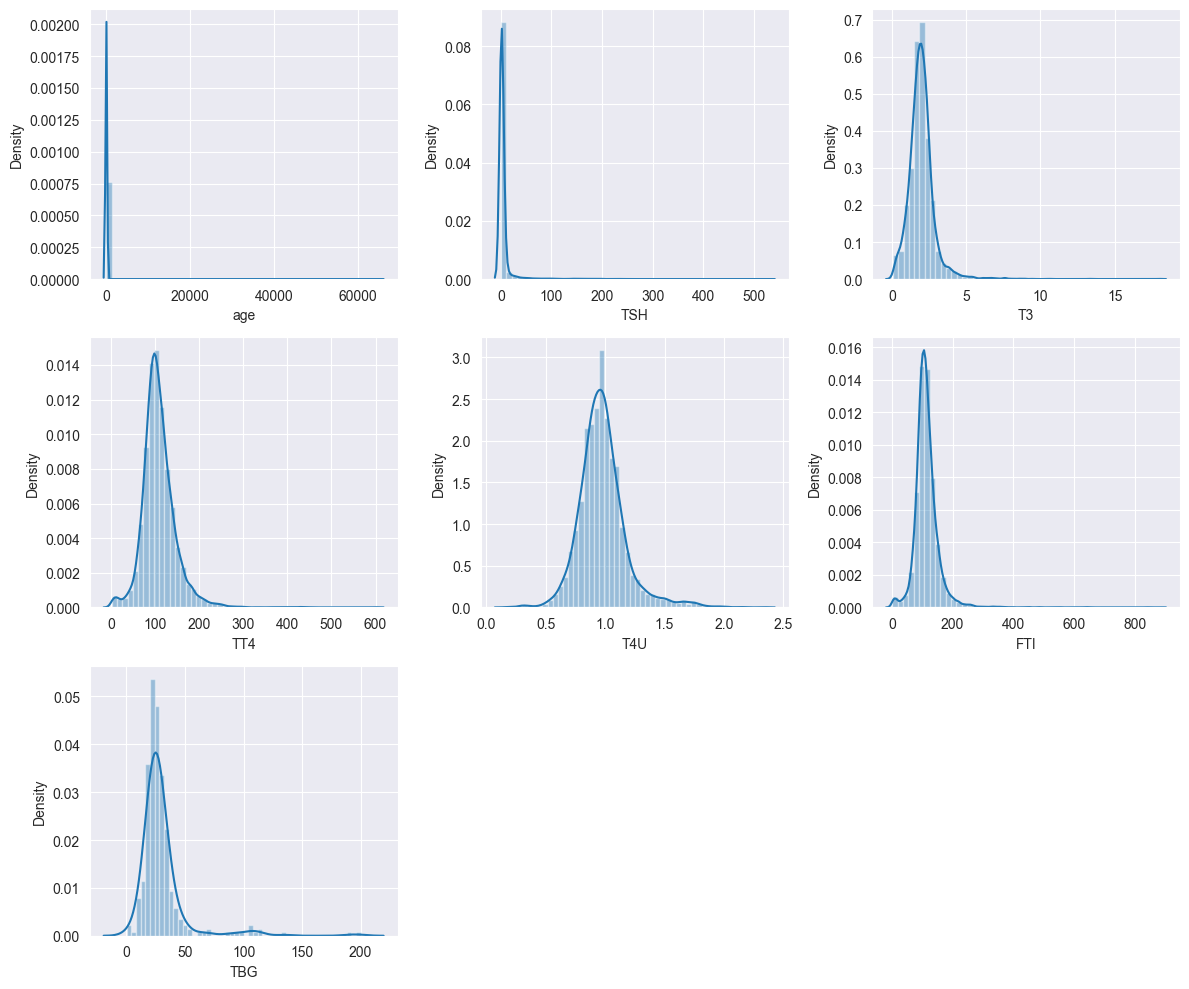

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[num_cols[i]])
    plt.tight_layout()

**It seems age feature has some serious issue of outliers. We can ignore the outliers in other features since they could be the indicators of the disease**

In [15]:
df['age'].unique()

array([   29,    41,    36,    32,    60,    77,    28,    54,    42,
          51,    37,    16,    43,    63,    40,    75,    56,    85,
          71,    67,    55,    61,    46,    44,    82,    64,    70,
          33,    59,    53,    52,    49,    35,    48,    27,    69,
          76,    73,    68,    66,    30,    88,    38,    58,    21,
          45,    83,    62,    25,    86,    72,    14,    15,    39,
          26,    20,    80,    90,    23,    18,    13,    78,    24,
          81,    92,    57,    74,     9,    47,    17,    11,    50,
          34,     8,    79,    31,    65,    84,    12,    10,    19,
          22,     1,     2,    97,     6,    89,    87,   455,    93,
           7,    91,     5,    94,     4, 65511,    95, 65512,     3,
       65526])

In [16]:
print("Ages greater than 100:")
for age in df['age'].unique():    
    if age > 100:
        print(age)

Ages greater than 100:
455
65511
65512
65526


**We will replace the ages greater than 100 with NaN value and then fill them with the mean of remaining values**

In [17]:
df['age'] = np.where(df['age'] > 100, np.nan, df['age'])

In [18]:
df['age'].unique()

array([29., 41., 36., 32., 60., 77., 28., 54., 42., 51., 37., 16., 43.,
       63., 40., 75., 56., 85., 71., 67., 55., 61., 46., 44., 82., 64.,
       70., 33., 59., 53., 52., 49., 35., 48., 27., 69., 76., 73., 68.,
       66., 30., 88., 38., 58., 21., 45., 83., 62., 25., 86., 72., 14.,
       15., 39., 26., 20., 80., 90., 23., 18., 13., 78., 24., 81., 92.,
       57., 74.,  9., 47., 17., 11., 50., 34.,  8., 79., 31., 65., 84.,
       12., 10., 19., 22.,  1.,  2., 97.,  6., 89., 87., nan, 93.,  7.,
       91.,  5., 94.,  4., 95.,  3.])

**It seems now all the age values are within 100**

In [19]:
## checking if the data is unbalanced or not
df['target'].value_counts()

target
-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
O        14
Q        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: count, dtype: int64

**Here we can see that the target classes namely 'LJ', 'GKJ', 'OI', 'D|R', 'E' have only one data point. This will create a problem when we will
try to split the data with sklearn's train_test_split with stratify = y. So, to avoid this issue for the split, we will duplicate this records 3 more time.**

In [20]:
mask = (df['target'] == 'LJ') | (df['target'] == 'GKJ') | (df['target'] == 'OI') | (df['target'] == 'D|R') | (df['target'] == 'E') | (df['target'] == 'P') | (df['target'] == 'MI') | (df['target'] == 'LJ')
df = pd.concat([df, df[mask], df[mask], df[mask], df[mask], df[mask], df[mask], df[mask], df[mask]])

In [21]:
df['target'].value_counts()

target
-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
P        45
J        30
B        21
MI       18
MK       16
O        14
Q        14
C|I      12
KJ       11
GI       10
LJ        9
D|R       9
E         9
OI        9
GKJ       9
D         8
H|K       8
C         6
FK        6
Name: count, dtype: int64

**sampling of the data points may help. This is because some the target classes are severly under-represented.**

In [22]:
## checking the presense of null values in the data
df.isnull().sum()

age                       4
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     858
T3_measured               0
T3                     2612
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     817
FTI_measured              0
FTI                     810
TBG_measured              0
TBG                    8919
target                    0
dtype: int64

**The features with naming of the format name_measured has two unique values t and f, t if the measurement is done and f if the measurement is not done**
**The features namely TSH, T3, TT4, T4U, FTI, TBG have null value whenever their corresponding measured columns has value f**
**So here the approach will to remove the name_measured columns and filling the null values in the columns TSH, T3, TT4, T4U, FTI, TBG with mean of the values in that column**

In [23]:
## removing unnecessary columns (removing feature named TBG because it has only 10% non-null values.)
df.drop(columns=['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','TBG','query_on_thyroxine','query_hypothyroid', 'query_hyperthyroid'],axis=1,inplace=True)

In [24]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant',
       'thyroid_surgery', 'I131_treatment', 'lithium', 'goitre', 'tumor',
       'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target'],
      dtype='object')

In [25]:
df.isnull().sum()

age                       4
sex                     307
on_thyroxine              0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     858
T3                     2612
TT4                     442
T4U                     817
FTI                     810
target                    0
dtype: int64

In [26]:
for feature in ['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured', 'query_on_thyroxine','query_hypothyroid', 'query_hyperthyroid']: # Removing TBG because it has too many missing values
    cat_cols.remove(feature)
    
num_cols.remove('TBG')

In [27]:
cat_cols

['sex',
 'on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'target']

In [28]:
num_cols

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [29]:
cat_cols.remove('target')

In [30]:
cat_cols

['sex',
 'on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych']

In [31]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

**Since the feature with the value '-' is shown whenever the patient is not suffering from the thyroid disease, we will replace '-' value with the 'Negative'.**

In [32]:
df['target'] = np.where(df['target'] == '-', 'Negative', df['target'])

In [33]:
df['target'].unique()

array(['Negative', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A',
       'KJ', 'L', 'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK',
       'MI', 'P', 'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'],
      dtype=object)

In [34]:
# label_dict = dict(zip(df['target'].unique(),range(len(df['target'].unique()))))
# label_dict

In [35]:
# df['target'] = df['target'].map(label_dict)

In [36]:
## Imports
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# for making the dataset balanced
from imblearn.over_sampling import SMOTE

**Check out the following online article for the information about the data sampling:
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/**

In [37]:
## 1. creating a pipeline to fill the null values and scale the values in categorical columns

undersampling_strategy = {
    'GK': 100,
    'AK': 100,
    'J': 100, 
    'B': 100,
    'MK': 100,
    'O': 100,
    'Q': 100,
    'C|I': 100,
    'KJ': 100,
    'GI': 100,
    'H|K': 100,
    'D': 100,
    'FK': 100,
    'C': 100,
    'P': 100,
    'MI': 100,
    'LJ': 100,
    'GKJ': 100,
    'D|R': 100,
    'E': 100,
    'OI': 100
}

smote = SMOTE(sampling_strategy=undersampling_strategy, k_neighbors = 4)

cat_pipe = Pipeline([
    
    ('cat_imputer1', SimpleImputer(missing_values=np.nan, strategy='most_frequent',add_indicator=True)),
    ('cat_encoder', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan)),
    ('cat_imputer2', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
])

## 2. Creating numerical pipeline

num_pipe = Pipeline([

    ('num_imputer',SimpleImputer(missing_values=np.nan, strategy='median',add_indicator=True)),
    ('std_scaler', StandardScaler())
])

In [38]:
## 3. Creating a combined pipeline

remainder_processor = SimpleImputer(missing_values=np.nan, strategy='most_frequent',add_indicator=True)

preprocess_pipe = ColumnTransformer([
    ('num_pipeline',num_pipe,num_cols),
    ('cat_pipeline',cat_pipe,cat_cols),
], remainder= remainder_processor)

In [39]:
## 6. splitting the data into independent and dependent features
X = df.drop(columns=['target'],axis=1)
y = df['target']

## 7.splitting the data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=195, stratify=y)

In [40]:
X_train = preprocess_pipe.fit_transform(X_train)
X_train, y_train = smote.fit_resample(X_train, y_train)

le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [41]:
X_test = preprocess_pipe.transform(X_test)
y_test = le.transform(y_test)

In [42]:
## Imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [66]:
## 4. Creating pipelines for different machine learning algorithms

log_reg = LogisticRegression(random_state=123,max_iter=2000)

knn = KNeighborsClassifier()

random_forest = RandomForestClassifier(random_state=456)

xgboost = XGBClassifier()

In [67]:
## 8. Checking the cross validation score for each of the above algorithms
classifiers = [log_reg, knn, random_forest, xgboost]
classifier_names = ['logistic regression classifer', 'KNeighbors classifier', 'Random forest classifier', 'xgboost classifier']

skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=789)

for i in range(len(classifiers)):
    cv_score = cross_val_score(classifiers[i],X_train, y_train,scoring='accuracy', cv=skf)
    print(f"The cross validation score for the {classifier_names[i]} based on accuracy score is {np.round(cv_score.mean(),3)} +/= {np.round(cv_score.std(),3)} .")

The cross validation score for the logistic regression classifer based on accuracy score is 0.871 +/= 0.007 .
The cross validation score for the KNeighbors classifier based on accuracy score is 0.87 +/= 0.009 .
The cross validation score for the Random forest classifier based on accuracy score is 0.948 +/= 0.005 .
The cross validation score for the xgboost classifier based on accuracy score is 0.946 +/= 0.006 .


**Let's try tweaking the parameters of these algorithms to get best estimator for the job.**

In [69]:
log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.arange(0,1,0.1),
    'max_iter': np.arange(100, 1000, 50)
}

knn_params = {
    'n_neighbors': np.arange(3,8,1)
}

rf_params = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': np.arange(2, 6, 1),
    'max_features': np.arange(3, X_train.shape[1], 1),
}

xgb_params = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': np.arange(2, 6, 1),
    'max_features': np.arange(3, X_train.shape[1], 1),
}

params = [log_reg_params, knn_params, rf_params, xgb_params]

In [71]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=789)
for i in range(len(classifiers)):
    rscv = RandomizedSearchCV(classifiers[i], param_distributions=params[i], random_state=10, cv=skf, scoring='accuracy')
    search = rscv.fit(X_train, y_train)
    print(f"The best score and best parameters for the {classifier_names[i]} are {search.best_score_} and {search.best_params_}.") 

The best score and best parameters for the logistic regression classifer are 0.8660608738363772 and {'penalty': 'l2', 'max_iter': np.int64(400), 'C': np.float64(0.7000000000000001)}.
The best score and best parameters for the KNeighbors classifier are 0.8715877443872312 and {'n_neighbors': np.int64(3)}.
The best score and best parameters for the Random forest classifier are 0.8742970084817264 and {'n_estimators': np.int64(300), 'max_features': np.int64(16), 'max_depth': np.int64(5)}.
The best score and best parameters for the xgboost classifier are 0.9457097834797874 and {'n_estimators': np.int64(400), 'max_features': np.int64(22), 'max_depth': np.int64(3)}.


In [75]:
log_reg = LogisticRegression(penalty='l2', max_iter=400, C=0.7)
knnc = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=300, max_features=16, max_depth=5)
xgbc = XGBClassifier(n_estimators=400, max_features=22, max_depth=3)

from sklearn.metrics import accuracy_score

classifiers = [log_reg, knnc, rfc, xgbc]
## Since we have already addressed the problem of imbalance in the data, we can use accuracy for scoring here.
for i in range(len(classifiers)):
    model = classifiers[i].fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"The accuracy score of the mode {classifier_names[i]} on the test data is {round(accuracy_score(y_pred=y_pred, y_true=y_test),3)}.")

The accuracy score of the mode logistic regression classifer on the test data is 0.846.
The accuracy score of the mode KNeighbors classifier on the test data is 0.831.
The accuracy score of the mode Random forest classifier on the test data is 0.887.
The accuracy score of the mode xgboost classifier on the test data is 0.935.
